In [1]:
#House Price Prediction

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
housing = pd.DataFrame(pd.read_csv("C:/Users/toshn/Desktop/housingdataset/housing.csv", error_bad_lines=False))

In [3]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
housing.shape

(545, 13)

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
housing["furnishingstatus"].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [7]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
# Check for missing values
print(housing.isnull().sum())

# No missing values found in this dataset, but if there were, you could handle them using:
# df.fillna(value, inplace=True) or df.dropna(inplace=True)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


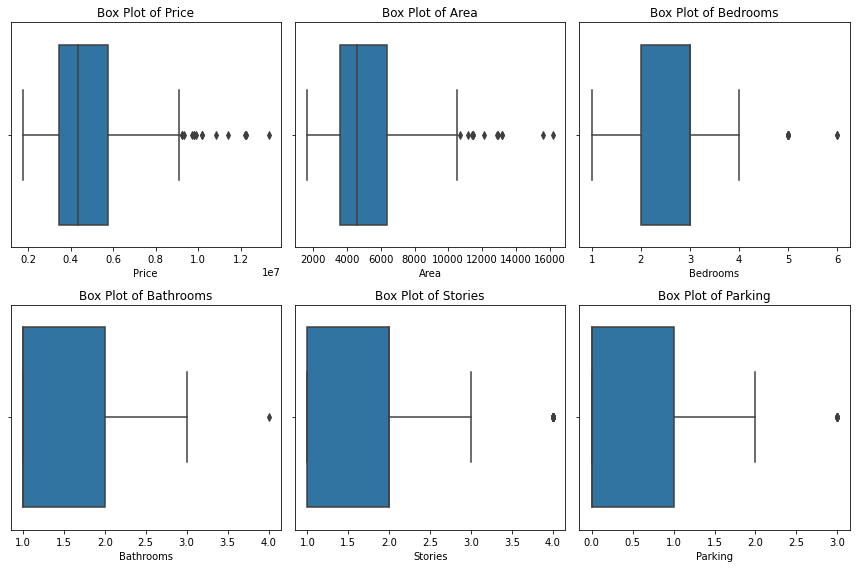

In [9]:
import seaborn as sns

# Select numeric variables for outlier analysis
numeric_variables = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Plot box plots for numeric variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_variables):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=housing[column])
    plt.xlabel(column.capitalize())
    plt.title(f'Box Plot of {column.capitalize()}')
plt.tight_layout()
plt.show()


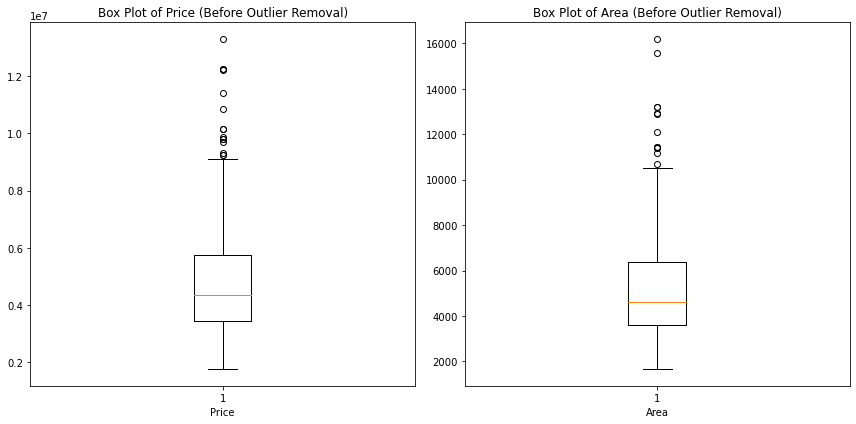

In [10]:
import seaborn as sns

# Select numeric variables for outlier analysis
numeric_variables = ['price', 'area']

# Plot box plots for 'Price' and 'Area' before removing outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_variables):
    plt.subplot(1, 2, i+1)
    plt.boxplot(x=housing[column])
    plt.xlabel(column.capitalize())
    plt.title(f'Box Plot of {column.capitalize()} (Before Outlier Removal)')
plt.tight_layout()
plt.show()


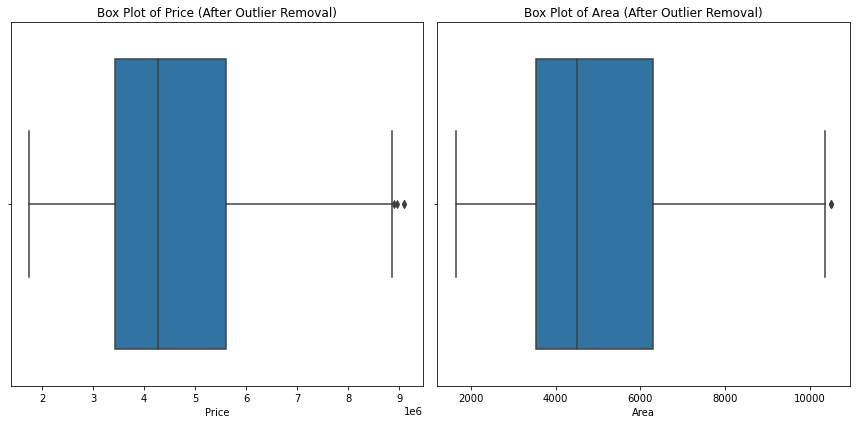

In [11]:
# Function to remove outliers based on IQR
def remove_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return dataframe[(dataframe[column] >= lower_bound) & (dataframe[column] <= upper_bound)]

# Plot box plots for 'Price' and 'Area' after removing outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(numeric_variables):
    plt.subplot(1, 2, i+1)
    housing_cleaned = remove_outliers(housing, column)
    sns.boxplot(x=housing_cleaned[column])
    plt.xlabel(column.capitalize())
    plt.title(f'Box Plot of {column.capitalize()} (After Outlier Removal)')
plt.tight_layout()
plt.show()


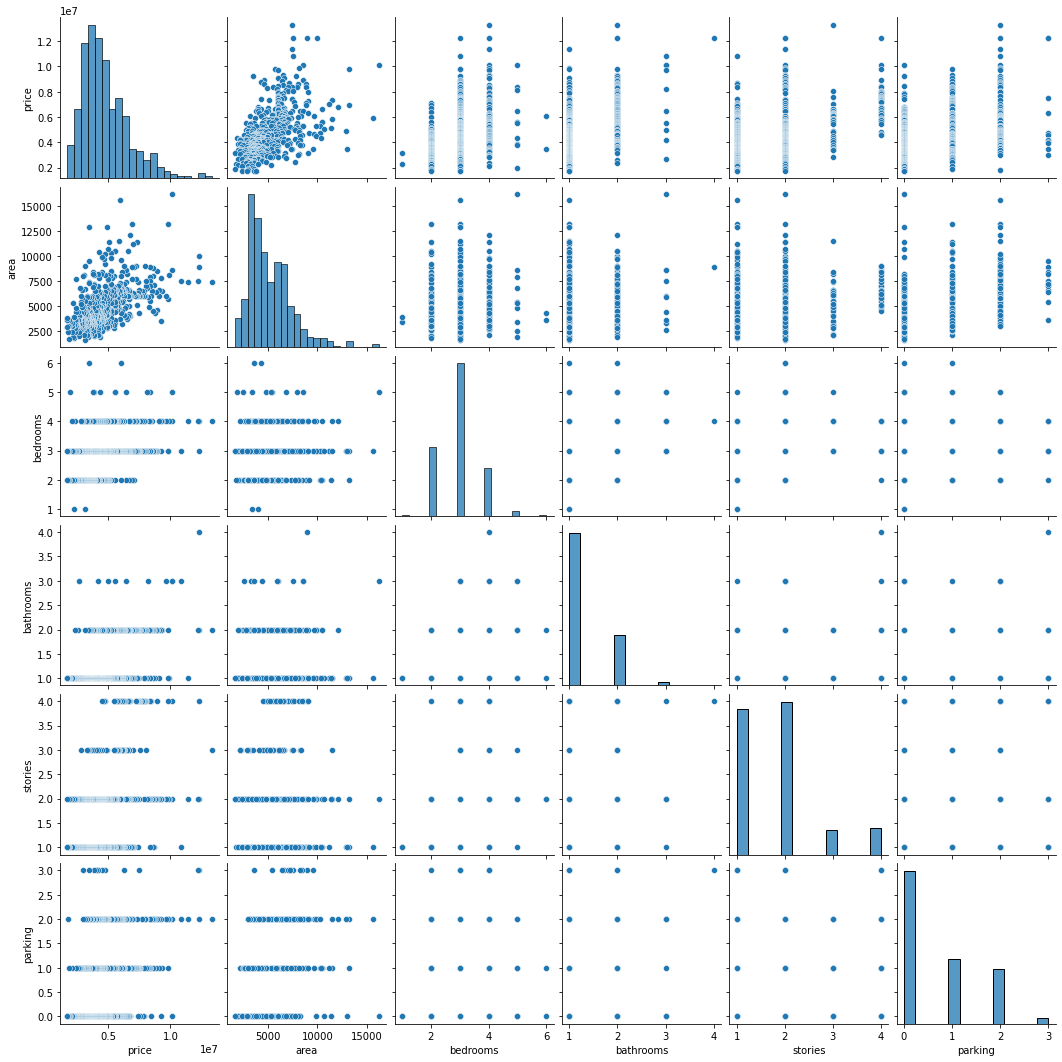

In [12]:
import seaborn as sns

# Select numeric variables for the pair plot
numeric_variables = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Create a pair plot for all numeric variables
sns.pairplot(housing[numeric_variables])
plt.show()

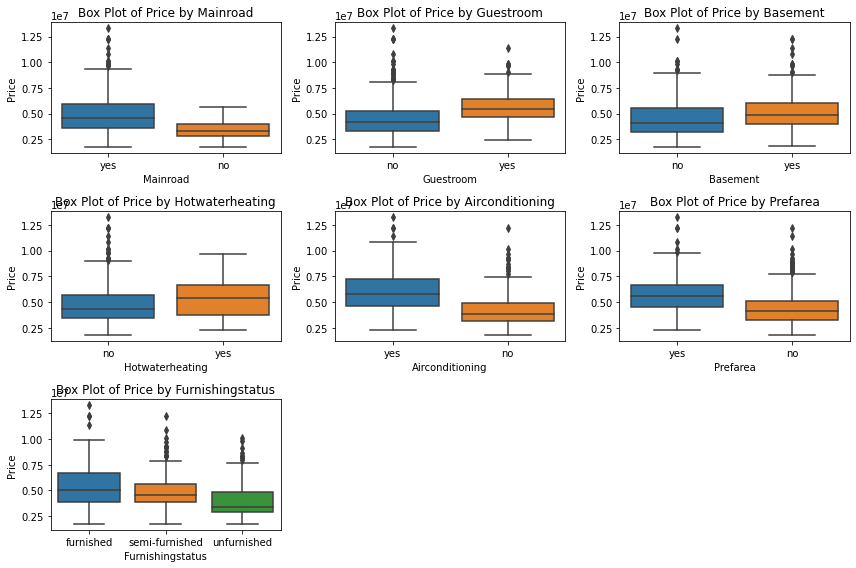

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select categorical variables for box plot
categorical_variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Create box plots for selected categorical variables
plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_variables):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=column, y='price', data=housing)
    plt.xlabel(column.capitalize())
    plt.ylabel('Price')
    plt.title(f'Box Plot of Price by {column.capitalize()}')
plt.tight_layout()
plt.show()


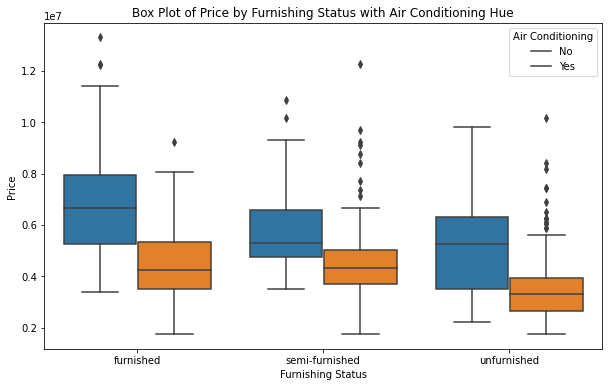

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plot for 'furnishingstatus' with 'airconditioning' as hue
plt.figure(figsize=(10, 6))
sns.boxplot(x='furnishingstatus', y='price', hue='airconditioning', data=housing)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.title('Box Plot of Price by Furnishing Status with Air Conditioning Hue')
plt.legend(title='Air Conditioning', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [15]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)



In [16]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [17]:
import pandas as pd
status = pd.get_dummies(housing['furnishingstatus'])

# Create dummy variables for 'furnishingstatus'
status = pd.get_dummies(housing['furnishingstatus'], drop_first=True)

# Concatenate the dummy variables with the original dataset
housing = pd.concat([housing, status], axis=1)

# Drop the original 'furnishingstatus' column from the dataset
housing.drop('furnishingstatus', axis=1, inplace=True)

# Verify the updated dataset
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [18]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
np.random.seed(0)
df_train, df_test= train_test_split(housing, train_size=0.7, test_size=0.3, random_state=100)

# Verify the shapes of the train and test sets
print("df_train shape:", df_train.shape)
print("df_test shape:", df_test.shape)

df_train shape: (381, 14)
df_test shape: (164, 14)


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [22]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [23]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


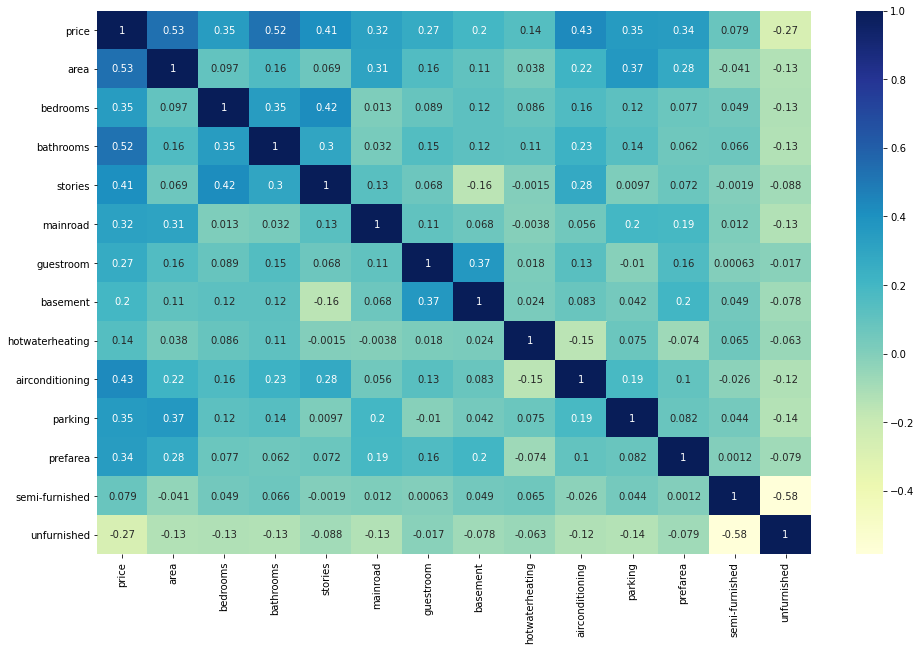

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [25]:
b_train = df_train.pop('price')
a_train = df_train

In [26]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [27]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(a_train, b_train)

LinearRegression()

In [28]:
rfe = RFE(lm, 6)             # running RFE
rfe = rfe.fit(a_train, b_train)

In [29]:
list(zip(a_train.columns,rfe.support_,rfe.ranking_))

[('area', True, 1),
 ('bedrooms', False, 2),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 3),
 ('guestroom', False, 5),
 ('basement', False, 7),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 4),
 ('prefarea', True, 1),
 ('semi-furnished', False, 8),
 ('unfurnished', False, 6)]

In [31]:
col = a_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [33]:
a_train.columns[~rfe.support_]

Index(['bedrooms', 'mainroad', 'guestroom', 'basement', 'parking',
       'semi-furnished', 'unfurnished'],
      dtype='object')

In [34]:
# Creating X_test dataframe with RFE selected variables
a_train_rfe = a_train[col]

In [36]:
 
import statsmodels.api as sm  
a_train_rfe = sm.add_constant(a_train_rfe)

lm = sm.OLS(b_train,a_train_rfe).fit()  

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     106.7
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           6.98e-78
Time:                        19:01:28   Log-Likelihood:                 353.86
No. Observations:                 381   AIC:                            -693.7
Df Residuals:                     374   BIC:                            -666.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0659      0.010     

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
a = a_train_rfe
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,4.24
5,airconditioning,1.20
2,bathrooms,1.16
3,stories,1.16
1,area,1.15
6,prefarea,1.10
4,hotwaterheating,1.06


In [39]:
b_train_price = lm.predict(a_train_rfe)

In [40]:
res = (b_train_price - b_train)

Text(0.5, 0, 'Errors')

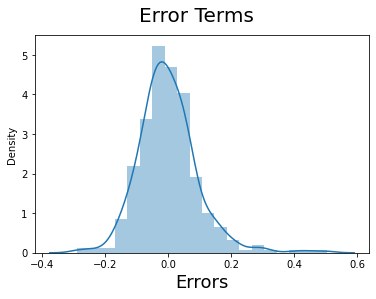

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


fig = plt.figure()
sns.distplot((b_train - b_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)     
plt.xlabel('Errors', fontsize = 18)

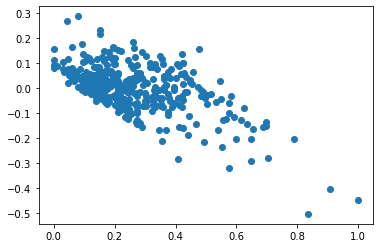

In [43]:
plt.scatter(b_train,res)
plt.show()

In [44]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [45]:
b_test = df_test.pop('price')
a_test = df_test

In [46]:
a_test = sm.add_constant(a_test)
a_test_rfe = a_test[a_train_rfe.columns]
b_pred = lm.predict(a_test_rfe)


In [47]:
from sklearn.metrics import r2_score 
r2_score(b_test, b_pred)



0.5350445027578824

Text(0, 0.5, 'b_pred')

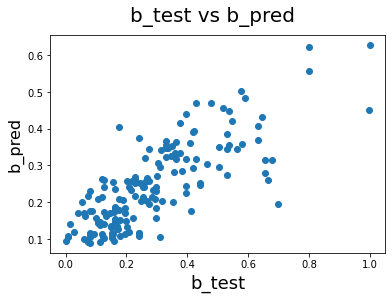

In [48]:
fig = plt.figure()
plt.scatter(b_test,b_pred)
fig.suptitle('b_test vs b_pred', fontsize=20)              # Plot heading 
plt.xlabel('b_test', fontsize=18)                          # X-label
plt.ylabel('b_pred', fontsize=16)  